In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Science 
## Project Task: Week 2

In [2]:
# 1. READ AND APPEND ALL VOLUMES
exp1=pd.read_csv('experiment_vol1.csv')
exp2=pd.read_csv('experiment_vol2.csv')
exp3=pd.read_csv('experiment_vol3.csv')


In [3]:
experiment_data = pd.concat([exp1, exp2, exp3], ignore_index=True)

In [4]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27495 entries, 0 to 27494
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Propeller's Name           27495 non-null  object 
 1   Blade's Name               27495 non-null  object 
 2   Propeller's Brand          27495 non-null  object 
 3   Number of Blades           27495 non-null  int64  
 4   Propeller's Diameter       27495 non-null  float64
 5   Propeller's Pitch          27495 non-null  float64
 6   Advanced Ratio Input       27495 non-null  float64
 7   RPM Rotation Input         27495 non-null  float64
 8   Thrust Coefficient Output  27495 non-null  float64
 9   Power Coefficient Output   27495 non-null  float64
 10  Efficiency Output          27495 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
geo1 = pd.read_csv("geom_vol1.csv")
geo2 = pd.read_csv("geom_vol2.csv")
geo3 = pd.read_csv("geom_vol3.csv")
geom_data = pd.concat([geo1, geo2, geo3], ignore_index=True)

In [6]:
geom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Blade's Name                       2316 non-null   object 
 1   Propeller's Brand                  2316 non-null   object 
 2   Propeller's Diameter               2316 non-null   float64
 3   Propeller's Pitch                  2316 non-null   float64
 4   Adimensional Chord - c/R           2316 non-null   float64
 5   Adimensional Radius - r/R          2316 non-null   float64
 6   beta - Angle Relative to Rotation  2316 non-null   float64
dtypes: float64(5), object(2)
memory usage: 126.8+ KB


In [7]:
# 2. Rename columns to follow Python naming conventions
experiment_data.columns = [
    "propeller_name", "blade_name", "propeller_brand", "num_blades", "propeller_diameter",
    "propeller_pitch", "advanced_ratio", "rpm", "thrust_coefficient", "power_coefficient", "efficiency"
]

geom_data.columns = [
    "blade_name", "propeller_brand", "propeller_diameter", "propeller_pitch",
    "adimensional_chord", "adimensional_radius", "beta_angle"
]

# 3. Compute actual Radius and Chord distributions
geom_data["radius"] = geom_data["adimensional_radius"] * (geom_data["propeller_diameter"] / 2)
geom_data["chord"] = geom_data["adimensional_chord"] * geom_data["propeller_diameter"]

# Display updated dataset structure
geom_data.head()


,blade_name,propeller_brand,propeller_diameter,propeller_pitch,adimensional_chord,adimensional_radius,beta_angle,radius,chord
0,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.160,0.15,31.68,0.675,1.440
1,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.146,0.20,34.45,0.900,1.314
2,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.144,0.25,35.93,1.125,1.296
3,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.143,0.30,33.33,1.350,1.287
4,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.143,0.35,29.42,1.575,1.287


In [8]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27495 entries, 0 to 27494
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   propeller_name      27495 non-null  object 
 1   blade_name          27495 non-null  object 
 2   propeller_brand     27495 non-null  object 
 3   num_blades          27495 non-null  int64  
 4   propeller_diameter  27495 non-null  float64
 5   propeller_pitch     27495 non-null  float64
 6   advanced_ratio      27495 non-null  float64
 7   rpm                 27495 non-null  float64
 8   thrust_coefficient  27495 non-null  float64
 9   power_coefficient   27495 non-null  float64
 10  efficiency          27495 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
# 4. Calculating Blade Area 

# Group data by blade name and integrate chord * radius to approximate blade area
blade_areas = geom_data.groupby("blade_name").apply(
    lambda df: np.trapz(df["chord"], df["radius"])
).reset_index(name="blade_area")


# Merge blade area back into geometry dataset
geom_data = geom_data.merge(blade_areas, on="blade_name", how="left")

# Display updated dataset with blade areas
geom_data.head()

,blade_name,propeller_brand,propeller_diameter,propeller_pitch,adimensional_chord,adimensional_radius,beta_angle,radius,chord,blade_area
0,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.160,0.15,31.68,0.675,1.440,4.635225
1,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.146,0.20,34.45,0.900,1.314,4.635225
2,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.144,0.25,35.93,1.125,1.296,4.635225
3,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.143,0.30,33.33,1.350,1.287,4.635225
4,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.143,0.35,29.42,1.575,1.287,4.635225


In [10]:
# 5. Compute Disc Area (A = π * R², where R is half of the propeller diameter)
geom_data["disc_area"] = np.pi * (geom_data["propeller_diameter"] / 2) ** 2

# 6. Compute Solidity (Blade Area / Disc Area)
geom_data["solidity"] = geom_data["blade_area"] / geom_data["disc_area"]

# Calculating Total Blade Area
blade_area_df = geom_data[["blade_name", "blade_area"]]
num_blades_df = experiment_data[["blade_name", "num_blades"]]

#Merge on blade_name
merged_df = pd.merge(blade_area_df, num_blades_df, on="blade_name", how="left")

# Compute total blade area
merged_df["total_blade_area"] = merged_df["blade_area"] * merged_df["num_blades"]
print(merged_df.head())
geom_data = geom_data.merge(merged_df[["blade_name", "total_blade_area"]],on="blade_name",how="left")

# Display updated dataset with disc area and solidity
geom_data.head()


        blade_name  blade_area  num_blades  total_blade_area
0  apc29ff 9.0x5.0    4.635225           2           9.27045
1  apc29ff 9.0x5.0    4.635225           2           9.27045
2  apc29ff 9.0x5.0    4.635225           2           9.27045
3  apc29ff 9.0x5.0    4.635225           2           9.27045
4  apc29ff 9.0x5.0    4.635225           2           9.27045


,blade_name,propeller_brand,propeller_diameter,propeller_pitch,adimensional_chord,adimensional_radius,beta_angle,radius,chord,blade_area,disc_area,solidity,total_blade_area
0,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.16,0.15,31.68,0.675,1.44,4.635225,63.617251,0.072861,9.27045
1,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.16,0.15,31.68,0.675,1.44,4.635225,63.617251,0.072861,9.27045
2,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.16,0.15,31.68,0.675,1.44,4.635225,63.617251,0.072861,9.27045
3,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.16,0.15,31.68,0.675,1.44,4.635225,63.617251,0.072861,9.27045
4,apc29ff 9.0x5.0,apc29ff,9.0,5.0,0.16,0.15,31.68,0.675,1.44,4.635225,63.617251,0.072861,9.27045


In [11]:
geom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6464484 entries, 0 to 6464483
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   blade_name           object 
 1   propeller_brand      object 
 2   propeller_diameter   float64
 3   propeller_pitch      float64
 4   adimensional_chord   float64
 5   adimensional_radius  float64
 6   beta_angle           float64
 7   radius               float64
 8   chord                float64
 9   blade_area           float64
 10  disc_area            float64
 11  solidity             float64
 12  total_blade_area     float64
dtypes: float64(11), object(2)
memory usage: 641.2+ MB


In [12]:
# 7. Merge solidity values into experiment data based on blade name and propeller brand
final_data = experiment_data.merge(
    geom_data[["blade_name", "propeller_brand", "solidity"]].drop_duplicates(),
    on=["blade_name", "propeller_brand"],
    how="left"
)

In [13]:
# Check for missing values in the final dataset
missing_values = final_data.isnull().sum()

# Display merged dataset and missing values summary
final_data.head(), missing_values

(     propeller_name    blade_name propeller_brand  num_blades  \
 0  ance 8.5x6.0 - 2  ance 8.5x6.0            ance           2   
 1  ance 8.5x6.0 - 2  ance 8.5x6.0            ance           2   
 2  ance 8.5x6.0 - 2  ance 8.5x6.0            ance           2   
 3  ance 8.5x6.0 - 2  ance 8.5x6.0            ance           2   
 4  ance 8.5x6.0 - 2  ance 8.5x6.0            ance           2   
 
    propeller_diameter  propeller_pitch  advanced_ratio     rpm  \
 0                 8.5              6.0           0.165  4000.0   
 1                 8.5              6.0           0.214  4000.0   
 2                 8.5              6.0           0.255  4000.0   
 3                 8.5              6.0           0.301  4000.0   
 4                 8.5              6.0           0.340  4000.0   
 
    thrust_coefficient  power_coefficient  efficiency  solidity  
 0              0.0993             0.0539       0.304       NaN  
 1              0.0947             0.0543       0.374       NaN  


In [14]:
geom_data["missing_values_flag"] = geom_data.isnull().any(axis=1).astype(int)


In [15]:
geom_data

,blade_name,propeller_brand,propeller_diameter,propeller_pitch,adimensional_chord,adimensional_radius,beta_angle,radius,chord,blade_area,disc_area,solidity,total_blade_area,missing_values_flag
0,apc29ff 9.0x5.0,apc29ff,9.0,5.000000,0.1600,0.15,31.680,0.675,1.4400,4.635225,63.617251,0.072861,9.27045,0
1,apc29ff 9.0x5.0,apc29ff,9.0,5.000000,0.1600,0.15,31.680,0.675,1.4400,4.635225,63.617251,0.072861,9.27045,0
2,apc29ff 9.0x5.0,apc29ff,9.0,5.000000,0.1600,0.15,31.680,0.675,1.4400,4.635225,63.617251,0.072861,9.27045,0
3,apc29ff 9.0x5.0,apc29ff,9.0,5.000000,0.1600,0.15,31.680,0.675,1.4400,4.635225,63.617251,0.072861,9.27045,0
4,apc29ff 9.0x5.0,apc29ff,9.0,5.000000,0.1600,0.15,31.680,0.675,1.4400,4.635225,63.617251,0.072861,9.27045,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6464479,union 9x7.72,union,9.0,7.718262,0.0964,1.00,2.932,4.500,0.8676,12.753855,63.617251,0.200478,25.50771,0
6464480,union 9x7.72,union,9.0,7.718262,0.0964,1.00,2.932,4.500,0.8676,12.753855,63.617251,0.200478,25.50771,0
6464481,union 9x7.72,union,9.0,7.718262,0.0964,1.00,2.932,4.500,0.8676,12.753855,63.617251,0.200478,25.50771,0
6464482,union 9x7.72,union,9.0,7.718262,0.0964,1.00,2.932,4.500,0.8676,12.753855,63.617251,0.200478,25.50771,0


In [16]:
# Compute mean solidity based on num_blades and propeller_diameter
solidity_means = final_data.groupby(["num_blades", "propeller_diameter"])["solidity"].transform("mean")


In [17]:
# Fill missing solidity values with the computed means
final_data["solidity"].fillna(solidity_means, inplace=True)


In [18]:
# As a final fallback, fill any remaining missing values with the overall mean solidity
final_data["solidity"].fillna(final_data["solidity"].mean(), inplace=True)

# Verify if all missing values are handled
missing_values_after = final_data.isnull().sum()

# Display final missing values summary
missing_values_after

propeller_name        0
blade_name            0
propeller_brand       0
num_blades            0
propeller_diameter    0
propeller_pitch       0
advanced_ratio        0
rpm                   0
thrust_coefficient    0
power_coefficient     0
efficiency            0
solidity              0
dtype: int64

In [19]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27495 entries, 0 to 27494
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   propeller_name      27495 non-null  object 
 1   blade_name          27495 non-null  object 
 2   propeller_brand     27495 non-null  object 
 3   num_blades          27495 non-null  int64  
 4   propeller_diameter  27495 non-null  float64
 5   propeller_pitch     27495 non-null  float64
 6   advanced_ratio      27495 non-null  float64
 7   rpm                 27495 non-null  float64
 8   thrust_coefficient  27495 non-null  float64
 9   power_coefficient   27495 non-null  float64
 10  efficiency          27495 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.3+ MB


In [20]:
geom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6464484 entries, 0 to 6464483
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   blade_name           object 
 1   propeller_brand      object 
 2   propeller_diameter   float64
 3   propeller_pitch      float64
 4   adimensional_chord   float64
 5   adimensional_radius  float64
 6   beta_angle           float64
 7   radius               float64
 8   chord                float64
 9   blade_area           float64
 10  disc_area            float64
 11  solidity             float64
 12  total_blade_area     float64
 13  missing_values_flag  int32  
dtypes: float64(11), int32(1), object(2)
memory usage: 665.8+ MB


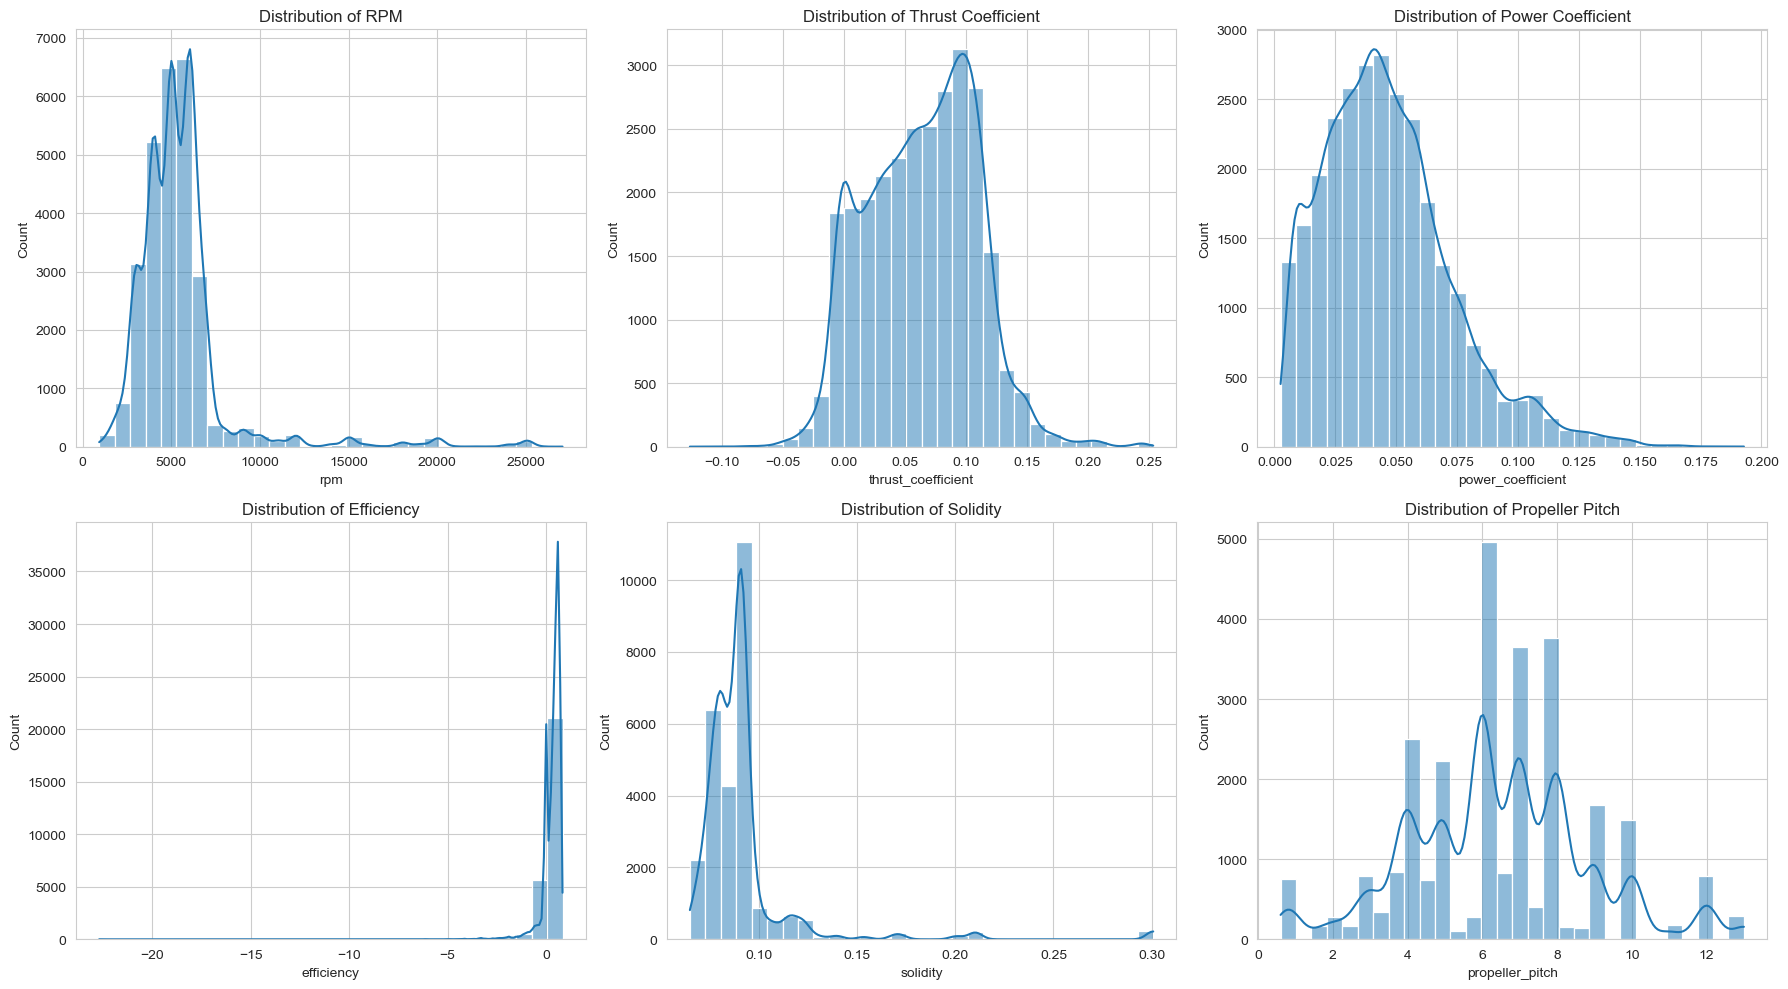

In [21]:
# 8. Visualization to shoecase the findings

# Set plot style
sns.set_style("whitegrid")

# Plot distributions of key numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(final_data["rpm"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of RPM")

sns.histplot(final_data["thrust_coefficient"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Thrust Coefficient")

sns.histplot(final_data["power_coefficient"], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Distribution of Power Coefficient")

sns.histplot(final_data["efficiency"], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Efficiency")

sns.histplot(final_data["solidity"], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Solidity")

sns.histplot(final_data["propeller_pitch"], bins=30, kde=True, ax=axes[1, 2])
axes[1, 2].set_title("Distribution of Propeller Pitch")

plt.tight_layout()
plt.show()


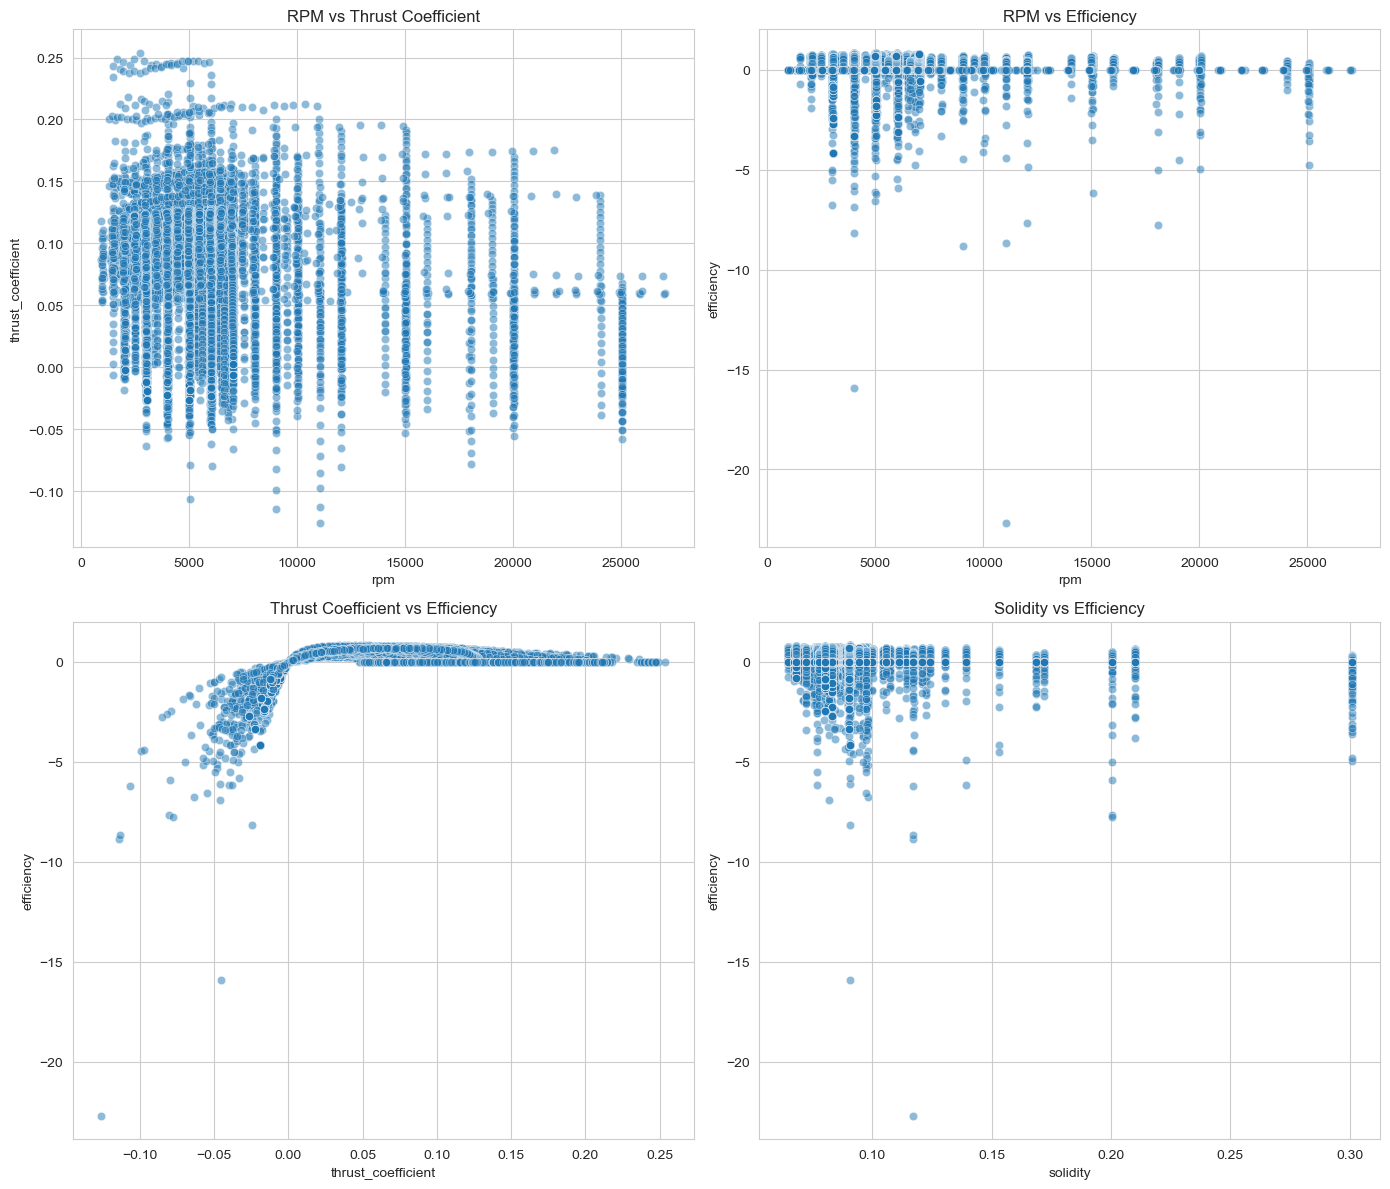

In [22]:
# 9. Bivariable Analysis
# Scatter plots to check relationships between key performance metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.scatterplot(x=final_data["rpm"], y=final_data["thrust_coefficient"], alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title("RPM vs Thrust Coefficient")

sns.scatterplot(x=final_data["rpm"], y=final_data["efficiency"], alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title("RPM vs Efficiency")

sns.scatterplot(x=final_data["thrust_coefficient"], y=final_data["efficiency"], alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title("Thrust Coefficient vs Efficiency")

sns.scatterplot(x=final_data["solidity"], y=final_data["efficiency"], alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Solidity vs Efficiency")

plt.tight_layout()
plt.show()


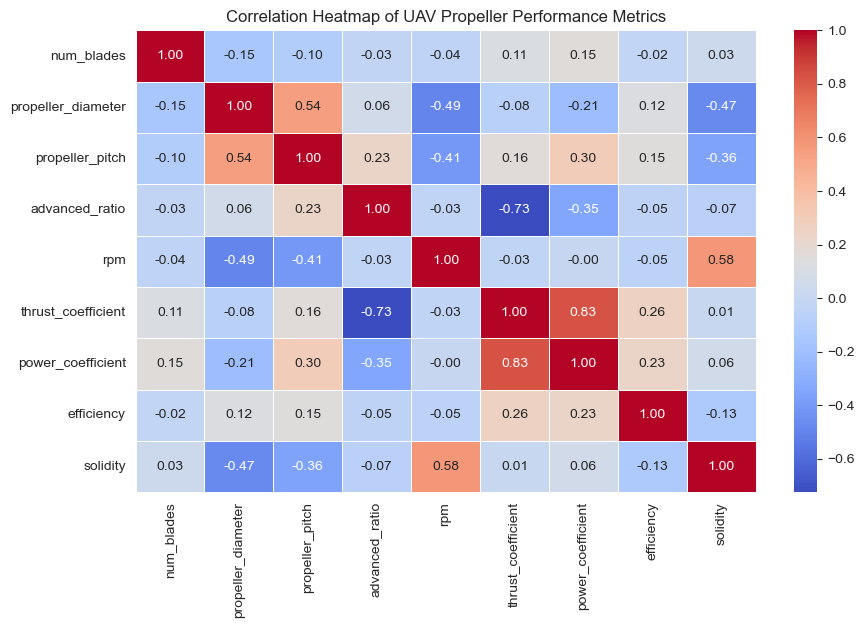

In [23]:
# 10. Generating a correlation heatmap using only numerical columns
plt.figure(figsize=(10, 6))
corr_matrix = final_data.select_dtypes(include=["number"]).corr()  # Select only numerical data
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of UAV Propeller Performance Metrics")
plt.show()


# Machine Learning
## Project Task: Week 2

In [34]:
#Machine learning model
# 12. Data preperation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target variable (efficiency is our main performance metric)
features = ["num_blades", "propeller_diameter", "propeller_pitch", "advanced_ratio", "rpm", "thrust_coefficient", "power_coefficient", "solidity"]
target = "efficiency"

# Filter for 2-blade propellers first (as per problem statement)
df_2_blades = final_data[final_data["num_blades"] == 2]

# Define X (features) and y (target variable)
X = df_2_blades[features]
y = df_2_blades[target]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#saving predictions for tableau
results_df = X_test.copy()
results_df["actual_efficiency"] = y_test.values
results_df["predicted_efficiency"] = y_pred
results_df.to_csv("efficiency_predictions.csv", index=False)

# Output dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((21292, 8), (5323, 8), (21292,), (5323,))

In [33]:
# Gradient boosting model - XG boost for Model Building
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = gb_model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2


(0.03079903031024179, 0.0032936424957129245, 0.9881637884330988)

In [35]:
#evaluating on other propellers
# Filter for non-2-blade propellers (to test generalization)
df_other_blades = final_data[final_data["num_blades"] != 2]

# Define X (features) and y (target variable) for other propellers
X_other = df_other_blades[features]
y_other = df_other_blades[target]

# Scale features using the previously fitted scaler
X_other_scaled = scaler.transform(X_other)

# Predict efficiency using the trained model
y_other_pred = gb_model.predict(X_other_scaled)

# Evaluate model performance on other propellers
mae_other = mean_absolute_error(y_other, y_other_pred)
mse_other = mean_squared_error(y_other, y_other_pred)
r2_other = r2_score(y_other, y_other_pred)

mae_other, mse_other, r2_other


(0.036574185629396516, 0.0029640535294968937, 0.9826233741225626)

In [36]:
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error: 0.0308
Mean Squared Error: 0.0033
R² Score: 0.9882


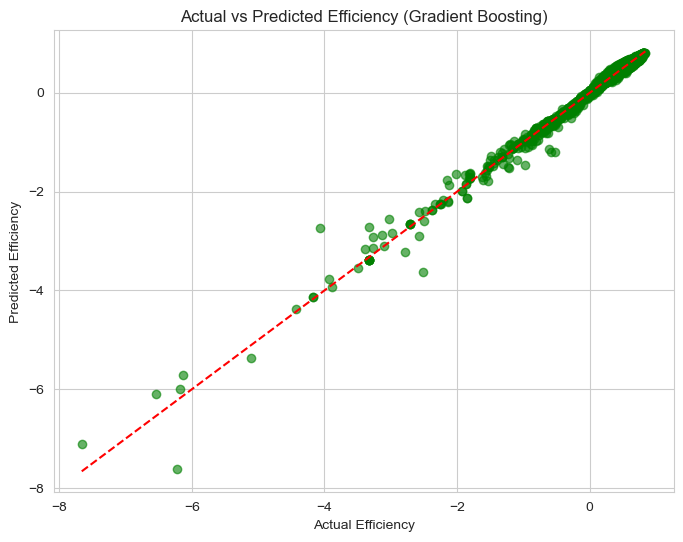

In [37]:
#Visualize Actual vs Predicted

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Efficiency')
plt.ylabel('Predicted Efficiency')
plt.title('Actual vs Predicted Efficiency (Gradient Boosting)')
plt.grid(True)
plt.show()


In [38]:
# Creating 3 types of models
# Train model without missing value imputation (original missing solidity values)
df_missing_solidity = final_data.copy()
df_missing_solidity.loc[final_data["solidity"].isnull(), "solidity"] = 0  # Replace missing values with zero

X_missing = df_missing_solidity[features]
y_missing = df_missing_solidity[target]

# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_missing, y_missing, test_size=0.2, random_state=42)

# Scale features
X_train_m_scaled = scaler.fit_transform(X_train_m)
X_test_m_scaled = scaler.transform(X_test_m)

# Train Gradient Boosting model
gb_model_missing = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model_missing.fit(X_train_m_scaled, y_train_m)

# Predict & Evaluate
y_pred_m = gb_model_missing.predict(X_test_m_scaled)
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

# Train model without Solidity feature
features_no_solidity = [f for f in features if f != "solidity"]  # Remove solidity
X_no_solidity = final_data[features_no_solidity]

# Train-test split
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_no_solidity, final_data[target], test_size=0.2, random_state=42)

# Scale features
X_train_ns_scaled = scaler.fit_transform(X_train_ns)
X_test_ns_scaled = scaler.transform(X_test_ns)

# Train Gradient Boosting model
gb_model_no_solidity = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model_no_solidity.fit(X_train_ns_scaled, y_train_ns)

# Predict & Evaluate
y_pred_ns = gb_model_no_solidity.predict(X_test_ns_scaled)
mae_ns = mean_absolute_error(y_test_ns, y_pred_ns)
mse_ns = mean_squared_error(y_test_ns, y_pred_ns)
r2_ns = r2_score(y_test_ns, y_pred_ns)

# Store results for comparison
model_comparisons = pd.DataFrame({
    "Model": ["With Solidity (Original)", "Without Imputation", "Without Solidity"],
    "MAE": [mae, mae_m, mae_ns],
    "MSE": [mse, mse_m, mse_ns],
    "R² Score": [r2, r2_m, r2_ns]
})

# Display results
model_comparisons


,Model,MAE,MSE,R² Score
0,With Solidity (Original),0.030799,0.003294,0.988164
1,Without Imputation,0.030742,0.003697,0.985452
2,Without Solidity,0.030765,0.003816,0.984986


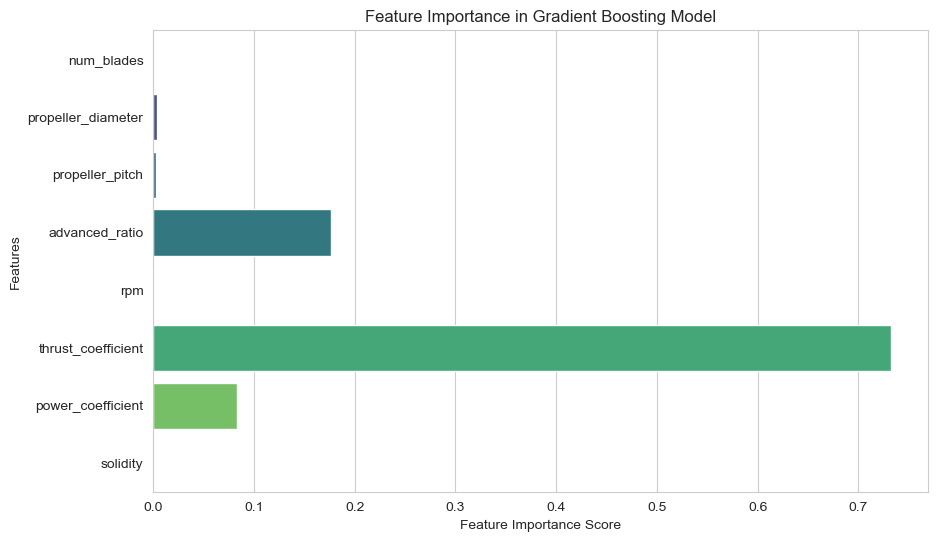

In [39]:
# Feature Importance Visualization
importances = gb_model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Gradient Boosting Model")
plt.show()


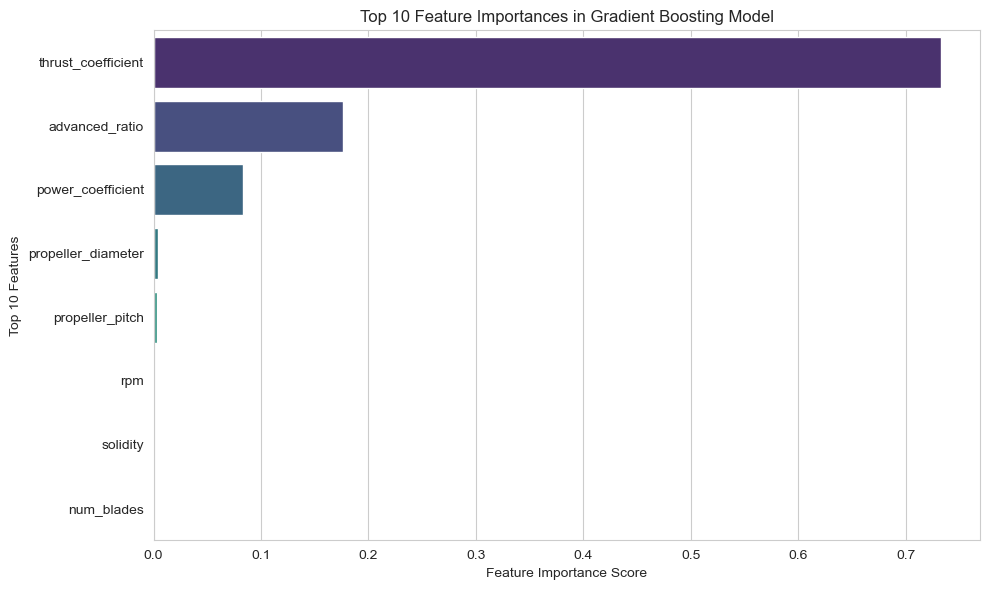

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Get feature importances
importances = gb_model.feature_importances_
feature_names = X.columns

# Step 2: Create and sort the DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

# Step 3: Plot the top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Top 10 Features")
plt.title("Top 10 Feature Importances in Gradient Boosting Model")
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the best model (original Gradient Boosting Model with Solidity)
joblib.dump(gb_model, "gb_model_uav.pkl")

# Save the scaler for future use
joblib.dump(scaler, "scaler_uav.pkl")

# Confirm files are saved
print("Files saved: gb_model_uav.pkl, scaler_uav.pkl")



# SQL

In [ ]:
# SQL 
import sqlite3

# Create in-memory SQLite DB
conn = sqlite3.connect(":memory:")

# Load experiment 1 into SQL table
experiment_data.to_sql("experiment1", conn, index=False, if_exists="replace")

# Load merged experiment data into another table
experiment_data.to_sql("merged_experiments", conn, index=False, if_exists="replace")


In [ ]:
experiment_data.info()

In [ ]:
# 1. Propellers with Thrust Coefficient > 12%
query1 = """
SELECT * FROM experiment1
WHERE thrust_coefficient > 0.12
"""
result1 = pd.read_sql_query(query1, conn)
display(result1)

query5 = """
SELECT COUNT(*) FROM experiment1
WHERE thrust_coefficient > 0.12
"""
result5 = pd.read_sql_query(query5, conn)
display(result5)


In [ ]:
# 2. Experiment 1 sorted by Efficiency (descending)

query2 = """
SELECT * FROM experiment1
ORDER BY efficiency DESC
"""
result2 = pd.read_sql_query(query2, conn)
display(result2)


In [ ]:
# 3. Bottom 100 by Power Coffecient
query3 = """
SELECT * FROM experiment1
ORDER BY power_coefficient ASC
LIMIT 100
"""
result3 = pd.read_sql_query(query3, conn)
display(result3)


In [ ]:
# 4. Count of propellers with zero or negative efficiency in all merged experiments
query4 = """
SELECT COUNT(*) AS count_negative_eff FROM merged_experiments
WHERE efficiency <= 0
"""
result4 = pd.read_sql_query(query4, conn)
display(result4)


# Tableau

In [42]:
# Saving combined dataset
experiment_data.to_csv("combined_experiment_data.csv", index=False)
geom_data.to_csv('combined_geometry_data.csv', index=False)
# Saving top 10 efficient propellers
top_10 = experiment_data[['blade_name', 'efficiency']].sort_values(by='efficiency', ascending=False).head(10)
top_10.to_csv("top_10_efficiency.csv", index=False)

# Saving solidity by brand
solidity_by_brand = geom_data.groupby("propeller_brand")['solidity'].mean().reset_index()
solidity_by_brand.to_csv("solidity_by_brand.csv", index=False)


In [45]:
geom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6464484 entries, 0 to 6464483
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   blade_name           object 
 1   propeller_brand      object 
 2   propeller_diameter   float64
 3   propeller_pitch      float64
 4   adimensional_chord   float64
 5   adimensional_radius  float64
 6   beta_angle           float64
 7   radius               float64
 8   chord                float64
 9   blade_area           float64
 10  disc_area            float64
 11  solidity             float64
 12  total_blade_area     float64
 13  missing_values_flag  int32  
dtypes: float64(11), int32(1), object(2)
memory usage: 665.8+ MB


In [44]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27495 entries, 0 to 27494
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   propeller_name      27495 non-null  object 
 1   blade_name          27495 non-null  object 
 2   propeller_brand     27495 non-null  object 
 3   num_blades          27495 non-null  int64  
 4   propeller_diameter  27495 non-null  float64
 5   propeller_pitch     27495 non-null  float64
 6   advanced_ratio      27495 non-null  float64
 7   rpm                 27495 non-null  float64
 8   thrust_coefficient  27495 non-null  float64
 9   power_coefficient   27495 non-null  float64
 10  efficiency          27495 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.3+ MB


In [46]:
# Saving combined dataset
experiment_data.to_csv("combined_experiment_data.csv", index=False)
geom_data.to_csv('combined_geometry_data.csv', index=False)
# Saving top 10 efficient propellers
top_10 = experiment_data[['blade_name', 'efficiency']].sort_values(by='efficiency', ascending=False).head(10)
top_10.to_csv("top_10_efficiency.csv", index=False)

# Saving solidity by brand
solidity_by_brand = geom_data.groupby("propeller_brand")['solidity'].mean().reset_index()
solidity_by_brand.to_csv("solidity_by_brand.csv", index=False)


In [ ]:
geom_data.info()

In [59]:
# After cleaning and processing the DataFrame
experiment_data.to_csv('combined_experiment_data.csv', index=False)
geom_data.to_csv('combined_geometry_data.csv', index=False)

solidity_by_brand.to_csv('solidity_by_brand.csv', index=False)

In [ ]:
top_eff = experiment_data[['blade_name', 'efficiency']].sort_values(by='efficiency', ascending=False).head(10)
top_eff.to_csv('top_10_efficiency.csv', index=False)

solidity_by_brand = geom_data.groupby('propeller_brand')['solidity'].mean().reset_index()
solidity_by_brand.to_csv('solidity_by_brand.csv', index=False)


In [ ]:
print("Common blade names:", set(experiment_data["blade_name"]) & set(geom_data["blade_name"]))


In [ ]:
combined_experiment_data



In [ ]:
print(geom_data["blade_name"].unique()[:10])


In [47]:
# Step 1: Clean blade_name in both experiment and geometry data
experiment_data["blade_name"] = experiment_data["blade_name"].astype(str).str.strip().str.lower()
geom_data["blade_name"] = geom_data["blade_name"].astype(str).str.strip().str.lower()


In [48]:
# Step 2: Check matching blade names
matching_blades = set(experiment_data["blade_name"]) & set(geom_data["blade_name"])
print(f"Number of matching blade names: {len(matching_blades)}")


Number of matching blade names: 120


In [49]:
# Step 5: Use merge with indicator to find unmatched
merge_keys = ["blade_name", "propeller_brand", "propeller_diameter", "propeller_pitch"]

check = experiment_data.merge(
    geom_cleaned,
    on=merge_keys,
    how="left",
    indicator=True
)

# Count matches vs non-matches
print(check["_merge"].value_counts())

# Show a few unmatched key combinations
print("\nSample unmatched keys:")
print(check[check["_merge"] == "left_only"][merge_keys].drop_duplicates().head(10))


NameError: name 'geom_cleaned' is not defined

In [50]:
# Step 5: Extract base blade model
experiment_data["blade_model"] = experiment_data["blade_name"].str.split().str[0]
print(experiment_data[["blade_name","blade_model"]].head())


     blade_name blade_model
0  ance 8.5x6.0        ance
1  ance 8.5x6.0        ance
2  ance 8.5x6.0        ance
3  ance 8.5x6.0        ance
4  ance 8.5x6.0        ance


In [51]:
experiment_data["blade_model"] = experiment_data["blade_name"].str.split(r"\s+").str[0]
experiment_data["blade_model"] = experiment_data["blade_name"].str.strip().str.split().str[0]
print(experiment_data[["blade_name", "blade_model"]].head())


     blade_name blade_model
0  ance 8.5x6.0        ance
1  ance 8.5x6.0        ance
2  ance 8.5x6.0        ance
3  ance 8.5x6.0        ance
4  ance 8.5x6.0        ance


In [52]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27495 entries, 0 to 27494
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   propeller_name      27495 non-null  object 
 1   blade_name          27495 non-null  object 
 2   propeller_brand     27495 non-null  object 
 3   num_blades          27495 non-null  int64  
 4   propeller_diameter  27495 non-null  float64
 5   propeller_pitch     27495 non-null  float64
 6   advanced_ratio      27495 non-null  float64
 7   rpm                 27495 non-null  float64
 8   thrust_coefficient  27495 non-null  float64
 9   power_coefficient   27495 non-null  float64
 10  efficiency          27495 non-null  float64
 11  blade_model         27495 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.5+ MB


In [53]:
geom_data.columns

Index(['blade_name', 'propeller_brand', 'propeller_diameter',
       'propeller_pitch', 'adimensional_chord', 'adimensional_radius',
       'beta_angle', 'radius', 'chord', 'blade_area', 'disc_area', 'solidity',
       'total_blade_area', 'missing_values_flag'],
      dtype='object')

In [54]:
# Step 1: Clean blade_name column
experiment_data["blade_name"] = experiment_data["blade_name"].str.strip()
geom_data["blade_name"] = geom_data["blade_name"].str.strip()

# Step 2: Drop duplicates in geom_data based on blade_name
geom_data_dedup = geom_data.drop_duplicates(subset=["blade_name"])

# Step 3: Merge
merged_data = experiment_data.merge(geom_data_dedup,on="blade_name",how="left")

# Step 4: Check result
print("Merged data shape:", merged_data.shape)
cols_to_keep = ["blade_name", "adimensional_chord", "beta_angle",'radius', 'chord', 'blade_area', 'disc_area', 'solidity',
       'total_blade_area', 'missing_values_flag']
geom_data_dedup = geom_data[cols_to_keep].drop_duplicates("blade_name")



Merged data shape: (27495, 25)


In [55]:
geom_data_dedup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 6018156
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   blade_name           120 non-null    object 
 1   adimensional_chord   120 non-null    float64
 2   beta_angle           120 non-null    float64
 3   radius               120 non-null    float64
 4   chord                120 non-null    float64
 5   blade_area           120 non-null    float64
 6   disc_area            120 non-null    float64
 7   solidity             120 non-null    float64
 8   total_blade_area     120 non-null    float64
 9   missing_values_flag  120 non-null    int32  
dtypes: float64(8), int32(1), object(1)
memory usage: 9.8+ KB


In [56]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27495 entries, 0 to 27494
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   propeller_name      27495 non-null  object 
 1   blade_name          27495 non-null  object 
 2   propeller_brand     27495 non-null  object 
 3   num_blades          27495 non-null  int64  
 4   propeller_diameter  27495 non-null  float64
 5   propeller_pitch     27495 non-null  float64
 6   advanced_ratio      27495 non-null  float64
 7   rpm                 27495 non-null  float64
 8   thrust_coefficient  27495 non-null  float64
 9   power_coefficient   27495 non-null  float64
 10  efficiency          27495 non-null  float64
 11  blade_model         27495 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.5+ MB


In [57]:
geom_data

,blade_name,propeller_brand,propeller_diameter,propeller_pitch,adimensional_chord,adimensional_radius,beta_angle,radius,chord,blade_area,disc_area,solidity,total_blade_area,missing_values_flag
0,apc29ff 9.0x5.0,apc29ff,9.0,5.000000,0.1600,0.15,31.680,0.675,1.4400,4.635225,63.617251,0.072861,9.27045,0
1,apc29ff 9.0x5.0,apc29ff,9.0,5.000000,0.1600,0.15,31.680,0.675,1.4400,4.635225,63.617251,0.072861,9.27045,0
2,apc29ff 9.0x5.0,apc29ff,9.0,5.000000,0.1600,0.15,31.680,0.675,1.4400,4.635225,63.617251,0.072861,9.27045,0
3,apc29ff 9.0x5.0,apc29ff,9.0,5.000000,0.1600,0.15,31.680,0.675,1.4400,4.635225,63.617251,0.072861,9.27045,0
4,apc29ff 9.0x5.0,apc29ff,9.0,5.000000,0.1600,0.15,31.680,0.675,1.4400,4.635225,63.617251,0.072861,9.27045,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6464479,union 9x7.72,union,9.0,7.718262,0.0964,1.00,2.932,4.500,0.8676,12.753855,63.617251,0.200478,25.50771,0
6464480,union 9x7.72,union,9.0,7.718262,0.0964,1.00,2.932,4.500,0.8676,12.753855,63.617251,0.200478,25.50771,0
6464481,union 9x7.72,union,9.0,7.718262,0.0964,1.00,2.932,4.500,0.8676,12.753855,63.617251,0.200478,25.50771,0
6464482,union 9x7.72,union,9.0,7.718262,0.0964,1.00,2.932,4.500,0.8676,12.753855,63.617251,0.200478,25.50771,0


In [58]:
experiment_data

,propeller_name,blade_name,propeller_brand,num_blades,propeller_diameter,propeller_pitch,advanced_ratio,rpm,thrust_coefficient,power_coefficient,efficiency,blade_model
0,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.165,4000.000,0.099300,0.053900,0.304,ance
1,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.214,4000.000,0.094700,0.054300,0.374,ance
2,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.255,4000.000,0.091600,0.054800,0.427,ance
3,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.301,4000.000,0.084700,0.054000,0.473,ance
4,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.340,4000.000,0.079600,0.053000,0.511,ance
...,...,...,...,...,...,...,...,...,...,...,...,...
27490,ancf 9.0x7.0 - 2,ancf 9.0x7.0,ancf,2,9.0,7.0,0.000,5453.333,0.123695,0.063178,0.000,ancf
27491,ancf 9.0x7.0 - 2,ancf 9.0x7.0,ancf,2,9.0,7.0,0.000,5960.000,0.123677,0.063333,0.000,ancf
27492,ancf 9.0x7.0 - 2,ancf 9.0x7.0,ancf,2,9.0,7.0,0.000,6466.667,0.124291,0.063651,0.000,ancf
27493,ancf 9.0x7.0 - 2,ancf 9.0x7.0,ancf,2,9.0,7.0,0.000,6960.000,0.125048,0.063481,0.000,ancf


In [ ]:
experiment_data.to_csv('combined_experiment_data.csv', index=False)
geom_data.to_csv('combined_geometry_data.csv', index=False)
